### Cluster Analysis of Camden High Streets

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [143]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import mapclassify as mc
import pysal as p
import palettable.matplotlib as palmpl
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette

In [2]:
df = pd.read_csv("Camden High Streets/camden-final-survival-full.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,2557,1,2557,0,1,False,True,Brecknock
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,1644,1,1644,0,1,False,True,Brecknock
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4217 non-null   int64  
 1   Unnamed: 0.1          4217 non-null   int64  
 2   Unnamed: 0.1.1        4217 non-null   int64  
 3   rates_code            4217 non-null   object 
 4   rates_authority_id    4217 non-null   object 
 5   rates_authority       4217 non-null   object 
 6   region                4217 non-null   object 
 7   address_no            4217 non-null   object 
 8   address_street        4217 non-null   object 
 9   address_town          4217 non-null   object 
 10  pc__pcs               4217 non-null   object 
 11  use_category          4217 non-null   object 
 12  scat_code             4217 non-null   int64  
 13  sub_category          4217 non-null   object 
 14  category              3983 non-null   object 
 15  floor_area           

In [17]:
X = df[['sub_category', 'floor_area', 'rental_valuation', 'rates_expected', 'rates_paid']]

In [18]:
X

,sub_category,floor_area,rental_valuation,rates_expected,rates_paid
0,Retail High Street,179.00,18000.0,8712.00,NaN
1,Retail High Street,179.00,24500.0,12225.50,9330.55
2,Retail High Street,94.38,12500.0,5887.50,NaN
3,Retail High Street,139.27,23500.0,11726.50,NaN
4,Retail High Street,47.40,7300.0,3642.70,NaN
...,...,...,...,...,...
4212,Office General,18.40,8400.0,4191.60,0.00
4213,Office General,17.83,8100.0,4041.90,28.52
4214,Office General,20.35,9300.0,4640.70,32.41
4215,Office General,18.30,8400.0,4191.60,0.00


In [19]:
cat_dummies = pd.get_dummies(X.sub_category)

In [28]:
X = df[['floor_area', 'rental_valuation', 'rates_expected']]

In [29]:
pd.concat([X, cat_dummies], axis=1)

,floor_area,rental_valuation,rates_expected,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
0,179.00,18000.0,8712.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,179.00,24500.0,12225.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,94.38,12500.0,5887.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,139.27,23500.0,11726.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,47.40,7300.0,3642.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,18.40,8400.0,4191.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4213,17.83,8100.0,4041.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4214,20.35,9300.0,4640.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4215,18.30,8400.0,4191.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,12651.000000
1,2,6135.781716
2,3,4029.021370
3,4,2636.293913
4,5,2058.622739
5,6,1580.540611
6,7,1243.718308
7,8,1061.494549
8,9,893.999345
9,10,788.009912


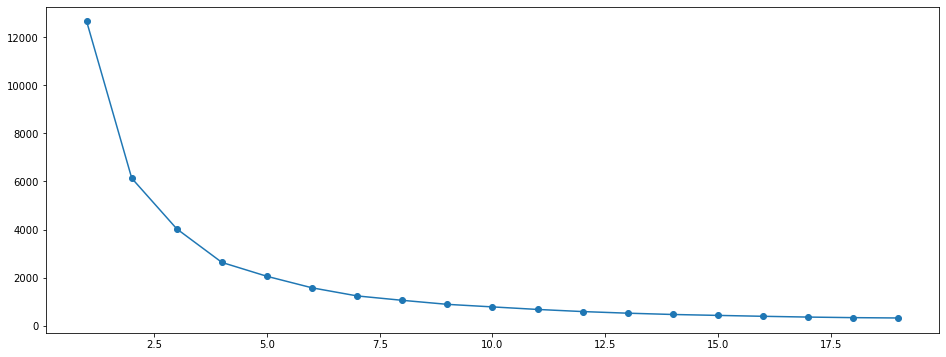

In [31]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Using the SSE (sum of square errors) to generate a value for the optimal number of clusters. The graph shows that the optimal number cold be 5 or 6 clusters. So, the silhouette scores are also calculated in order to justify the choice between these two options.

Text(0.5, 1.0, 'Silhouette Score per # of Clusters')

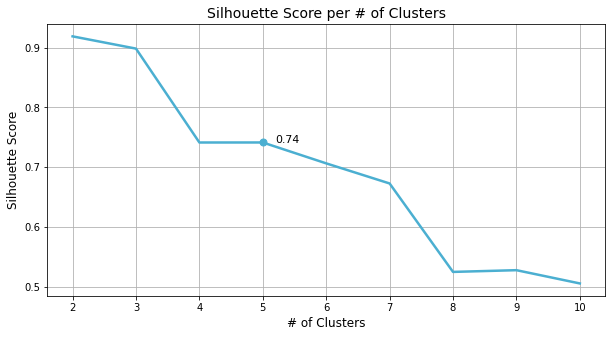

In [32]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, 
                                              kmeans.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(0, 9), silhouette_scores, color='#4bafd1', linewidth=2.5,
         marker='o', markersize=7.0, markevery=[3])
plt.annotate(round(silhouette_scores[3], 2), (3.2, silhouette_scores[2]),
             fontsize=11)
plt.grid()
plt.xticks(ticks=range(0, 9), labels=range(2, 11))
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score per # of Clusters', fontsize=14)

The silhouette score determines that 5 clusters is the optimal

In [33]:
clusters = KMeans(5)  
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['cluster_label'] = clusters.labels_
df.head()
df.sort_values(by=['cluster_label'],ascending = True)
X.head(6)

,floor_area,rental_valuation,rates_expected
0,179.00,18000.0,8712.00
1,179.00,24500.0,12225.50
2,94.38,12500.0,5887.50
3,139.27,23500.0,11726.50
4,47.40,7300.0,3642.70
5,59.24,13750.0,6861.25


In [34]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet,cluster_label
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,0 days,2557,1,2557,0,1,False,True,Brecknock,0
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2557 days,4018,0,1461,2557,1,False,True,Brecknock,0
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,0 days,1644,1,1644,0,1,False,True,Brecknock,0
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,2557 days,4018,0,1461,2557,1,False,True,Brecknock,0
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,2557 days,4018,0,1461,2557,1,False,True,Brecknock,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,00782002470001,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2833 days,4018,0,1185,2833,1,False,False,Eversholt,0
4213,4213,414838,414838,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2737 days,4018,0,1281,2737,0,False,False,Eversholt,0
4214,4214,414898,414898,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2737 days,4018,0,1281,2737,0,False,False,Eversholt,0
4215,4215,414853,414853,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2833 days,4018,0,1185,2833,1,False,False,Eversholt,0


### Cluster only by sub category

In [67]:
hs_dummies = pd.get_dummies(df.highstreet)

In [68]:
cat_dummies = pd.get_dummies(df.sub_category)

In [69]:
Y = cat_dummies

In [70]:
pd.concat([Y, hs_dummies], axis=1)

,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,...,Kentish,Kilburn,Loudoun,Mansfield,Mill,Queens,Regents,SouthEnd,WestEnd,Willesden
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4213,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4214,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4215,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( Y_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df2 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df2[0:10]

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  if __name__ == '__main__':


,num_clusters,cluster_errors
0,1,75906.000000
1,2,70012.133370
2,3,64747.157567
3,4,60080.497872
4,5,55423.811858
5,6,51105.582191
6,7,46721.886744
7,8,42468.446421
8,9,38126.373058
9,10,33865.899231


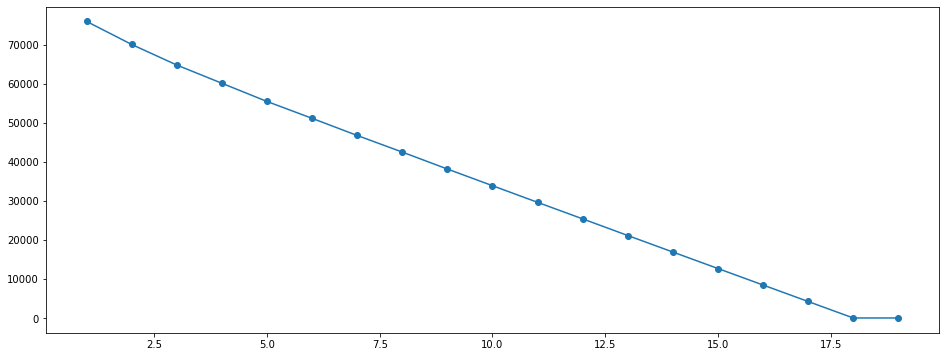

In [72]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df2.num_clusters, clusters_df2.cluster_errors, marker = "o" );

Using the SSE (sum of square errors) to generate a value for the optimal number of clusters. The graph shows that the optimal number cold be 5 or 6 clusters. So, the silhouette scores are also calculated in order to justify the choice between these two options.

Text(0.5, 1.0, 'Silhouette Score per # of Clusters')

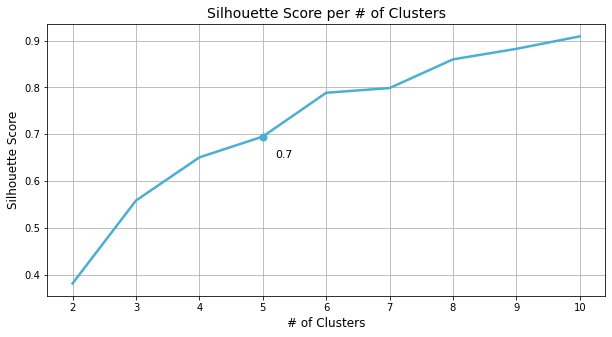

In [73]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters).fit(Y_scaled)
    silhouette_scores.append(silhouette_score(Y_scaled, 
                                              kmeans.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(0, 9), silhouette_scores, color='#4bafd1', linewidth=2.5,
         marker='o', markersize=7.0, markevery=[3])
plt.annotate(round(silhouette_scores[3], 2), (3.2, silhouette_scores[2]),
             fontsize=11)
plt.grid()
plt.xticks(ticks=range(0, 9), labels=range(2, 11))
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score per # of Clusters', fontsize=14)

The silhouette score determines that 5 clusters is the optimal

In [74]:
clusters = KMeans(5)  
clusters.fit( Y )
clusters.cluster_centers_
clusters.labels_

df['cluster_label1'] = clusters.labels_
df.head()
df.sort_values(by=['cluster_label1'],ascending = True)
Y.head(6)

,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [75]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet,cluster_label,cluster_label1
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2557,1,2557,0,1,False,True,Brecknock,0,1
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,4018,0,1461,2557,1,False,True,Brecknock,0,1
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,1644,1,1644,0,1,False,True,Brecknock,0,1
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,4018,0,1461,2557,1,False,True,Brecknock,0,1
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,4018,0,1461,2557,1,False,True,Brecknock,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,00782002470001,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,4018,0,1185,2833,1,False,False,Eversholt,0,2
4213,4213,414838,414838,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,4018,0,1281,2737,0,False,False,Eversholt,0,2
4214,4214,414898,414898,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,4018,0,1281,2737,0,False,False,Eversholt,0,2
4215,4215,414853,414853,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,4018,0,1185,2833,1,False,False,Eversholt,0,2


# V2 reformatting the data and conducting profiles

In [76]:
df1 = pd.read_csv("Camden High Streets/camden-final-survival-full.csv")

In [77]:
df1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,2557,1,2557,0,1,False,True,Brecknock
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,1644,1,1644,0,1,False,True,Brecknock
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,00782002470001,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt
4213,4213,414838,414838,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4214,4214,414898,414898,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4215,4215,414853,414853,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt


In [78]:
df1['highstreet'] = df1['highstreet'].astype('category')

In [79]:
df1['sub_category'] = df1['sub_category'].astype('category')

In [80]:
df1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31883,31883,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,2557,1,2557,0,1,False,True,Brecknock
1,1,31899,31899,00233002300007,E09000007,Camden,Inner London - West,23,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
2,2,31433,31433,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,0 days,1644,1,1644,0,1,False,True,Brecknock
3,3,32339,32339,00233004900009,E09000007,Camden,Inner London - West,49,BRECKNOCK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
4,4,84736,84736,00532000300006,E09000007,Camden,Inner London - West,3,CAMDEN PARK ROAD,LONDON,...,2010-04-01,2557 days,4018,0,1461,2557,1,False,True,Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,4212,414793,414793,00782002470001,E09000007,Camden,Inner London - West,SUITE 107A. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt
4213,4213,414838,414838,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4214,4214,414898,414898,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018,0,1281,2737,0,False,False,Eversholt
4215,4215,414853,414853,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2833 days,4018,0,1185,2833,1,False,False,Eversholt


In [84]:
highstreets = list(df1['highstreet'].unique())

In [85]:
highstreets

['Brecknock',
 'Kentish',
 'Fortress',
 'CamdenT',
 'Belsize',
 'Loudoun',
 'Haverstock',
 'SouthEnd',
 'Cricklewood',
 'Regents',
 'Queens',
 'Kilburn',
 'Mill',
 'Fortune',
 'Willesden',
 'Mansfield',
 'WestEnd',
 'Hampstead',
 'Eversholt']

In [89]:
Breck = df1.loc[df1['highstreet'] == 'Brecknock']

In [95]:
categorical = list(df1['sub_category'].unique())

In [96]:
categorical

['Retail High Street',
 'Office General',
 'Other Public',
 'Industrial General',
 'Retail Restaurants & Cafes',
 'Office Serviced Office',
 'Retail Financial & Professional Services',
 'Industrial Light',
 'Retail Other Superstores/ Retail Warehouses',
 'Other Commercial',
 'Leisure Sports centres and Private Clubs',
 'Leisure Amusement & Entertainment Centres',
 'Leisure Cultural Attractions',
 'Retail Food Superstores',
 'Warehousing  Large Scale and High Bay',
 'Leisure General Hotels (3 star)',
 'Leisure Budget Hotels',
 'Office IT / Data Centres']

In [99]:
Breck.groupby('sub_category').count()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
sub_category,,,,,,,,,,,,,,,,,,,,,
Industrial General,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Industrial Light,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure Amusement & Entertainment Centres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure Budget Hotels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure Cultural Attractions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure General Hotels (3 star),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leisure Sports centres and Private Clubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Office General,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Office IT / Data Centres,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df2 = df1[['sub_category', 'highstreet']]

In [117]:
hs_dummies = pd.get_dummies(df2.highstreet)

In [118]:
hs_dummies

,Belsize,Brecknock,CamdenT,Cricklewood,Eversholt,Fortress,Fortune,Hampstead,Haverstock,Kentish,Kilburn,Loudoun,Mansfield,Mill,Queens,Regents,SouthEnd,WestEnd,Willesden
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4213,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4214,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4215,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
sub_cats = df2.groupby('sub_category').sum()

In [125]:
format = pd.concat([sub_cats, hs_dummies], axis=1)

In [126]:
format

,highstreet,Belsize,Brecknock,CamdenT,Cricklewood,Eversholt,Fortress,Fortune,Hampstead,Haverstock,Kentish,Kilburn,Loudoun,Mansfield,Mill,Queens,Regents,SouthEnd,WestEnd,Willesden
Industrial General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industrial Light,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Amusement & Entertainment Centres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Budget Hotels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Cultural Attractions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4213,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4214,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4215,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
Breck = df2.loc[df1['highstreet'] == 'Brecknock']

In [115]:
Breck.groupby('sub_category').count()

,highstreet
sub_category,
Industrial General,4
Industrial Light,0
Leisure Amusement & Entertainment Centres,0
Leisure Budget Hotels,0
Leisure Cultural Attractions,0
Leisure General Hotels (3 star),0
Leisure Sports centres and Private Clubs,0
Office General,17
Office IT / Data Centres,0


## Camden Total Mix

In [135]:
Camden_Use = df2.groupby('sub_category').count()

In [136]:
Camden_Use

,highstreet
sub_category,
Industrial General,176
Industrial Light,15
Leisure Amusement & Entertainment Centres,14
Leisure Budget Hotels,2
Leisure Cultural Attractions,1
Leisure General Hotels (3 star),5
Leisure Sports centres and Private Clubs,22
Office General,998
Office IT / Data Centres,1


In [116]:
df2.groupby('highstreet').count()

,sub_category
highstreet,
Belsize,79
Brecknock,76
CamdenT,1250
Cricklewood,62
Eversholt,137
Fortress,443
Fortune,72
Hampstead,328
Haverstock,102


In [137]:
counter = 0 
stoppingCondition = len(highstreets)

while counter < stoppingCondition:
        i = highstreets[counter]
        m = df1.loc[df1['highstreet'] == i]
        m = m.groupby('sub_category').count()
        Camden_Use[i] = m['highstreet']
        counter += 1

In [138]:
Camden_Use

,highstreet,Brecknock,Kentish,Fortress,CamdenT,Belsize,Loudoun,Haverstock,SouthEnd,Cricklewood,Regents,Queens,Kilburn,Mill,Fortune,Willesden,Mansfield,WestEnd,Hampstead,Eversholt
sub_category,,,,,,,,,,,,,,,,,,,,
Industrial General,176,4,21,15,59,5,17,0,1,0,1,20,14,0,0,1,0,18,0,0
Industrial Light,15,0,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,7,0,0
Leisure Amusement & Entertainment Centres,14,0,0,1,9,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0
Leisure Budget Hotels,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Leisure Cultural Attractions,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leisure General Hotels (3 star),5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0
Leisure Sports centres and Private Clubs,22,0,0,3,4,0,4,1,1,0,0,1,2,0,2,0,0,2,2,0
Office General,998,17,82,56,426,33,3,35,12,2,38,4,25,12,9,5,0,122,56,61
Office IT / Data Centres,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [140]:
X = Camden_Use.drop(['highstreet'], axis=1)

In [148]:
X = X.transpose()

In [176]:
X

sub_category,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
Brecknock,4,0,0,0,0,0,0,17,0,15,0,3,1,0,30,0,6,0
Kentish,21,6,0,0,0,0,0,82,0,0,2,5,1,0,62,2,19,0
Fortress,15,0,1,0,1,0,3,56,0,0,0,25,8,1,275,2,56,0
CamdenT,59,0,9,1,0,1,4,426,0,0,16,37,16,0,501,7,171,2
Belsize,5,0,0,0,0,1,0,33,0,0,0,1,0,0,27,0,12,0
Loudoun,17,0,0,0,0,0,4,3,0,0,0,1,1,0,37,2,4,0
Haverstock,0,1,0,0,0,0,1,35,0,0,3,5,1,0,40,1,15,0
SouthEnd,1,0,0,0,0,0,1,12,0,0,0,7,1,0,42,0,19,0
Cricklewood,0,0,0,0,0,0,0,2,0,0,0,2,1,0,41,6,10,0
Regents,1,0,0,0,0,0,0,38,0,0,0,5,1,0,52,0,14,0


In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,342.000000
1,2,170.923377
2,3,121.666931
3,4,87.526399
4,5,67.366083
5,6,47.640208
6,7,35.564332
7,8,24.875636
8,9,17.793036
9,10,13.216060


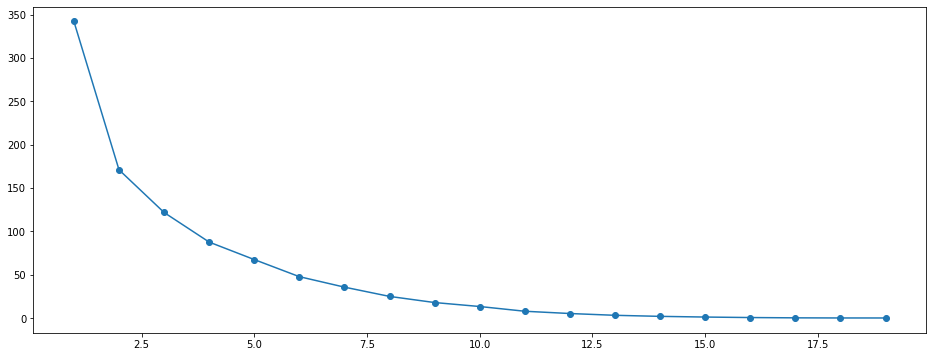

In [150]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

Using the SSE (sum of square errors) to generate a value for the optimal number of clusters. The graph shows that the optimal number cold be 5 or 6 clusters. So, the silhouette scores are also calculated in order to justify the choice between these two options.

Text(0.5, 1.0, 'Silhouette Score per # of Clusters')

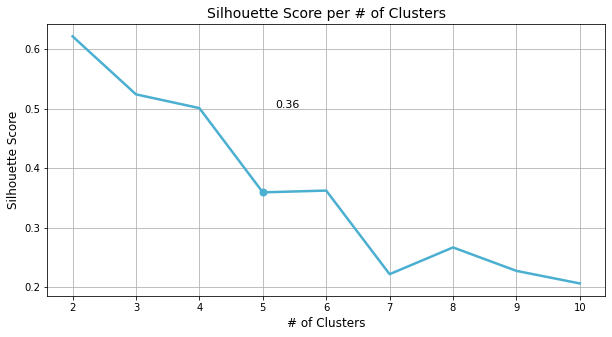

In [151]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters).fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, 
                                              kmeans.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(0, 9), silhouette_scores, color='#4bafd1', linewidth=2.5,
         marker='o', markersize=7.0, markevery=[3])
plt.annotate(round(silhouette_scores[3], 2), (3.2, silhouette_scores[2]),
             fontsize=11)
plt.grid()
plt.xticks(ticks=range(0, 9), labels=range(2, 11))
plt.xlabel('# of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score per # of Clusters', fontsize=14)

The silhouette score determines that 5 clusters is the optimal

In [154]:
df = X.copy()

In [164]:
clusters = KMeans(5)  
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

#df['cluster_label'] = clusters.labels_
#df.head()
#df.sort_values(by=['cluster_label'],ascending = True)
X.head(6)

sub_category,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,Office General,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
Brecknock,4,0,0,0,0,0,0,17,0,15,0,3,1,0,30,0,6,0
Kentish,21,6,0,0,0,0,0,82,0,0,2,5,1,0,62,2,19,0
Fortress,15,0,1,0,1,0,3,56,0,0,0,25,8,1,275,2,56,0
CamdenT,59,0,9,1,0,1,4,426,0,0,16,37,16,0,501,7,171,2
Belsize,5,0,0,0,0,1,0,33,0,0,0,1,0,0,27,0,12,0
Loudoun,17,0,0,0,0,0,4,3,0,0,0,1,1,0,37,2,4,0


In [204]:
clusters = list(clusters.labels_)

AttributeError: 'list' object has no attribute 'labels_'

In [205]:
highstreets

['Brecknock',
 'Kentish',
 'Fortress',
 'CamdenT',
 'Belsize',
 'Loudoun',
 'Haverstock',
 'SouthEnd',
 'Cricklewood',
 'Regents',
 'Queens',
 'Kilburn',
 'Mill',
 'Fortune',
 'Willesden',
 'Mansfield',
 'WestEnd',
 'Hampstead',
 'Eversholt']

In [206]:
clusters

[0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 4]

In [207]:
highstreet_cluster = {'High Street':highstreets,'Cluster':clusters}

In [208]:
highstreet_cluster = pd.DataFrame(highstreet_cluster)

In [209]:
highstreet_cluster

,High Street,Cluster
0,Brecknock,0
1,Kentish,4
2,Fortress,2
3,CamdenT,1
4,Belsize,0
5,Loudoun,0
6,Haverstock,0
7,SouthEnd,0
8,Cricklewood,0
9,Regents,0


In [210]:
X.index

Index(['Brecknock', 'Kentish', 'Fortress', 'CamdenT', 'Belsize', 'Loudoun',
       'Haverstock', 'SouthEnd', 'Cricklewood', 'Regents', 'Queens', 'Kilburn',
       'Mill', 'Fortune', 'Willesden', 'Mansfield', 'WestEnd', 'Hampstead',
       'Eversholt'],
      dtype='object')

In [211]:
CAMCLUS = pd.merge(highstreet_cluster, X, left_on = highstreet_cluster['High Street'], right_on = X.index)

In [224]:
CAMCLUS

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay,colour
0,Brecknock,Brecknock,0,4,0,0,0,0,0,0,...,15,0,3,1,0,30,0,6,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
1,Kentish,Kentish,4,21,6,0,0,0,0,0,...,0,2,5,1,0,62,2,19,0,"(0.8156862745098039, 0.7333333333333333, 1.0)"
2,Fortress,Fortress,2,15,0,1,0,1,0,3,...,0,0,25,8,1,275,2,56,0,"(0.5529411764705883, 0.8980392156862745, 0.631..."
3,CamdenT,CamdenT,1,59,0,9,1,0,1,4,...,0,16,37,16,0,501,7,171,2,"(1.0, 0.7058823529411765, 0.5098039215686274)"
4,Belsize,Belsize,0,5,0,0,0,0,1,0,...,0,0,1,0,0,27,0,12,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
5,Loudoun,Loudoun,0,17,0,0,0,0,0,4,...,0,0,1,1,0,37,2,4,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
6,Haverstock,Haverstock,0,0,1,0,0,0,0,1,...,0,3,5,1,0,40,1,15,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
7,SouthEnd,SouthEnd,0,1,0,0,0,0,0,1,...,0,0,7,1,0,42,0,19,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
8,Cricklewood,Cricklewood,0,0,0,0,0,0,0,0,...,0,0,2,1,0,41,6,10,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."
9,Regents,Regents,0,1,0,0,0,0,0,0,...,0,0,5,1,0,52,0,14,0,"(0.6313725490196078, 0.788235294117647, 0.9568..."


In [212]:
Group1 = CAMCLUS.loc[CAMCLUS['Cluster'] == 0]

In [213]:
Group1

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
0,Brecknock,Brecknock,0,4,0,0,0,0,0,0,...,0,15,0,3,1,0,30,0,6,0
4,Belsize,Belsize,0,5,0,0,0,0,1,0,...,0,0,0,1,0,0,27,0,12,0
5,Loudoun,Loudoun,0,17,0,0,0,0,0,4,...,0,0,0,1,1,0,37,2,4,0
6,Haverstock,Haverstock,0,0,1,0,0,0,0,1,...,0,0,3,5,1,0,40,1,15,0
7,SouthEnd,SouthEnd,0,1,0,0,0,0,0,1,...,0,0,0,7,1,0,42,0,19,0
8,Cricklewood,Cricklewood,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,41,6,10,0
9,Regents,Regents,0,1,0,0,0,0,0,0,...,0,0,0,5,1,0,52,0,14,0
10,Queens,Queens,0,20,1,0,0,0,0,1,...,0,0,1,10,0,0,91,1,6,0
12,Mill,Mill,0,0,0,0,0,0,0,0,...,0,0,1,5,0,0,73,0,3,0
13,Fortune,Fortune,0,0,0,0,0,0,0,2,...,1,0,1,6,0,0,40,2,11,0


In [214]:
Group2 = CAMCLUS.loc[CAMCLUS['Cluster'] == 1]
Group2

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
3,CamdenT,CamdenT,1,59,0,9,1,0,1,4,...,0,0,16,37,16,0,501,7,171,2


In [215]:
Group3 = CAMCLUS.loc[CAMCLUS['Cluster'] == 2]
Group3

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
2,Fortress,Fortress,2,15,0,1,0,1,0,3,...,0,0,0,25,8,1,275,2,56,0
16,WestEnd,WestEnd,2,18,7,1,1,0,3,2,...,0,1,7,38,19,0,345,6,89,2


In [216]:
Group4 = CAMCLUS.loc[CAMCLUS['Cluster'] == 3]
Group4

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office IT / Data Centres,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay
11,Kilburn,Kilburn,3,14,0,3,0,0,0,2,...,0,0,0,12,4,0,167,6,36,0
17,Hampstead,Hampstead,3,0,0,0,0,0,0,2,...,0,0,5,20,5,0,199,0,41,0


In [225]:
Group5 = CAMCLUS[CAMCLUS['Cluster']==4]
Group5

,key_0,High Street,Cluster,Industrial General,Industrial Light,Leisure Amusement & Entertainment Centres,Leisure Budget Hotels,Leisure Cultural Attractions,Leisure General Hotels (3 star),Leisure Sports centres and Private Clubs,...,Office Serviced Office,Other Commercial,Other Public,Retail Financial & Professional Services,Retail Food Superstores,Retail High Street,Retail Other Superstores/ Retail Warehouses,Retail Restaurants & Cafes,Warehousing Large Scale and High Bay,colour
1,Kentish,Kentish,4,21,6,0,0,0,0,0,...,0,2,5,1,0,62,2,19,0,"(0.8156862745098039, 0.7333333333333333, 1.0)"
18,Eversholt,Eversholt,4,0,0,0,0,0,0,0,...,0,2,11,2,0,50,0,11,0,"(0.8156862745098039, 0.7333333333333333, 1.0)"


In [222]:
## Assign cluster colours

colours = sns.color_palette("pastel")
CAMCLUS['colour'] =  CAMCLUS['Cluster'].apply(lambda x : colours[x])

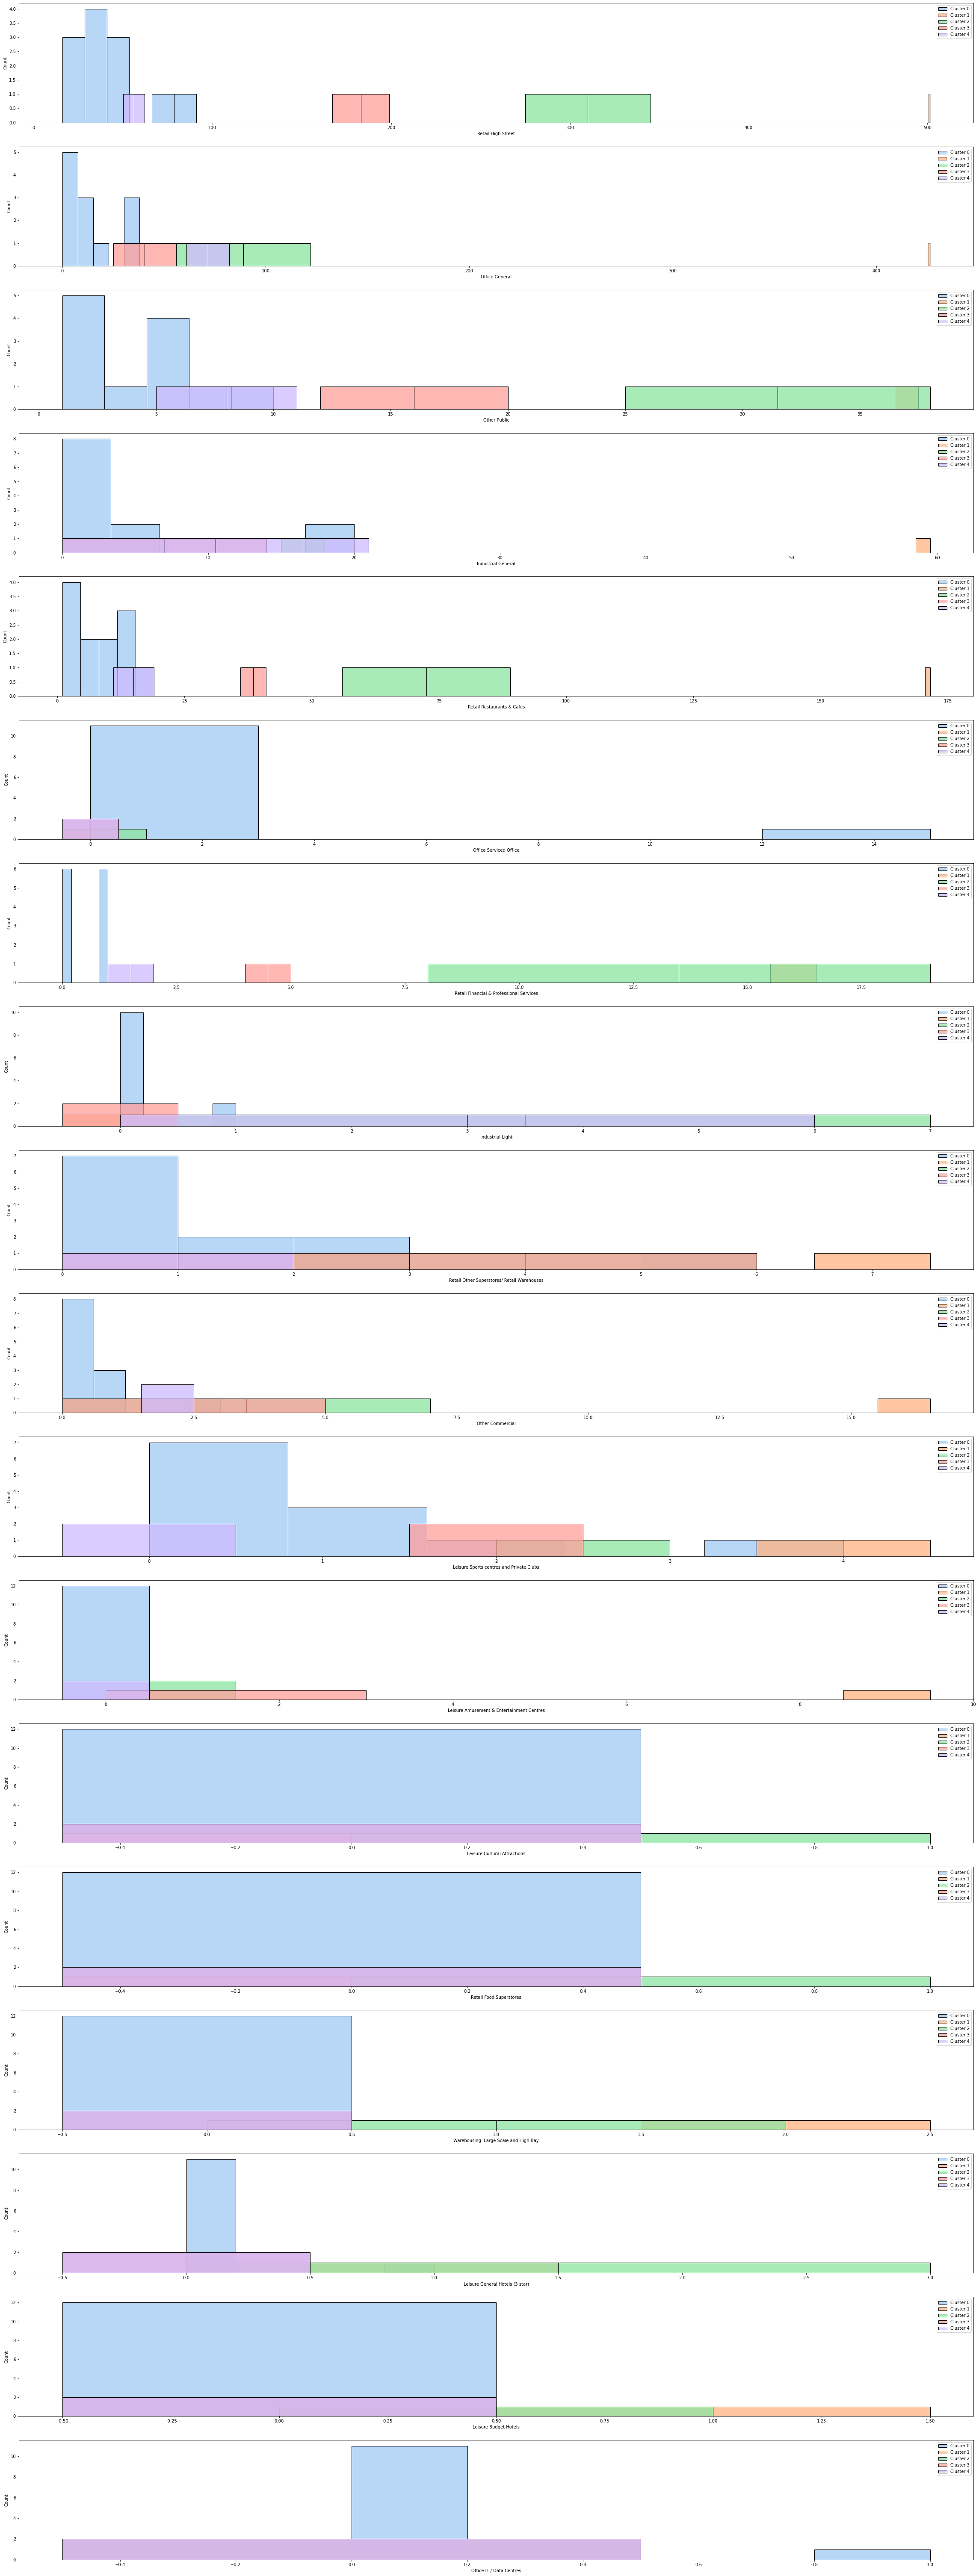

In [231]:
fig, ax = plt.subplots(nrows=18, ncols=1, figsize=(40, 110))


for i, a in enumerate(['Retail High Street', 'Office General',
 'Other Public',
 'Industrial General',
 'Retail Restaurants & Cafes',
 'Office Serviced Office',
 'Retail Financial & Professional Services',
 'Industrial Light',
 'Retail Other Superstores/ Retail Warehouses',
 'Other Commercial',
 'Leisure Sports centres and Private Clubs',
 'Leisure Amusement & Entertainment Centres',
 'Leisure Cultural Attractions',
 'Retail Food Superstores',
 'Warehousing  Large Scale and High Bay',
 'Leisure General Hotels (3 star)',
 'Leisure Budget Hotels',
 'Office IT / Data Centres']):
    
    
    sns.histplot(ax=ax[i], label="Cluster 0", data=CAMCLUS[CAMCLUS['Cluster']==0], x=a, color=colours[0])
    sns.histplot( ax=ax[i],label="Cluster 1", data=CAMCLUS[CAMCLUS['Cluster']==1], x=a, color=colours[1])
    sns.histplot(ax=ax[i],label="Cluster 2", data=CAMCLUS[CAMCLUS['Cluster']==2], x=a, color=colours[2])
    sns.histplot( ax=ax[i],label="Cluster 3", data=CAMCLUS[CAMCLUS['Cluster']==3], x=a, color=colours[3])
    sns.histplot( ax=ax[i],label="Cluster 4", data=CAMCLUS[CAMCLUS['Cluster']==4], x=a, color=colours[4])

    ax[i].legend()
    
fig.savefig('Camden High Street Clusters.jpg')